<a href="https://colab.research.google.com/github/buon-viaggio/SOCAR-AI-BOOT-CAMP/blob/main/%EC%8F%98%EC%B9%B4AI_2nd_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount Drive and Import Pacakges

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data

### Load and prepare data

In [3]:
root = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "data")
root

'/content/drive/MyDrive/Colab Notebooks/data'

In [4]:
def get_data(data, root, download=True, transform=transforms.ToTensor()):
  if data.lower() == "mnist":
    train = datasets.MNIST(root=root, train=True, download=download, transform=transform)
#    train = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True, num_workers=1)  # Randomness  추가
    test = datasets.MNIST(root=root, train=False, download=download, transform=transform)
#    test = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=True, num_workers=1)    # Randomness  추가
  elif data.lower() == "fmnist":
    train = datasets.FashionMNIST(root=root, train=True, download=download, transform=transform)
    test = datasets.FashionMNIST(root=root, train=False, download=download, transform=transform)
  else:
    raise ValueError(f"data name {data} is not supported.")

  return train, test

In [5]:
mnist_tr, mnist_test = get_data(data="MNIST", root=root)
fmnist_tr, fmnist_test = get_data(data="FMNIST", root=root)

In [6]:
mnist_tr

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
fmnist_tr

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()

### Check datasets

In [8]:
def plot_mnist(data, figsize=(20, 10)):
  fig = plt.figure(figsize=figsize)
  for i in range(18):
    img = data[i][0]
    ax = fig.add_subplot(3, 6, i+1)
    ax.imshow(img.reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {data[i][1]}")
  fig.show()
  pass

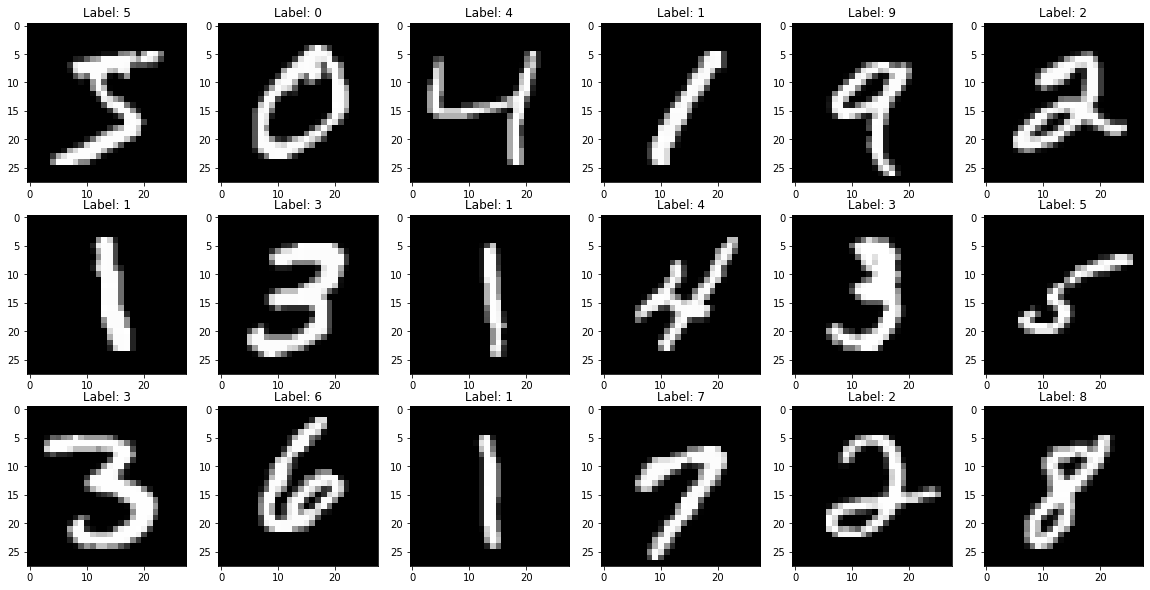

In [9]:
plot_mnist(data=mnist_tr)

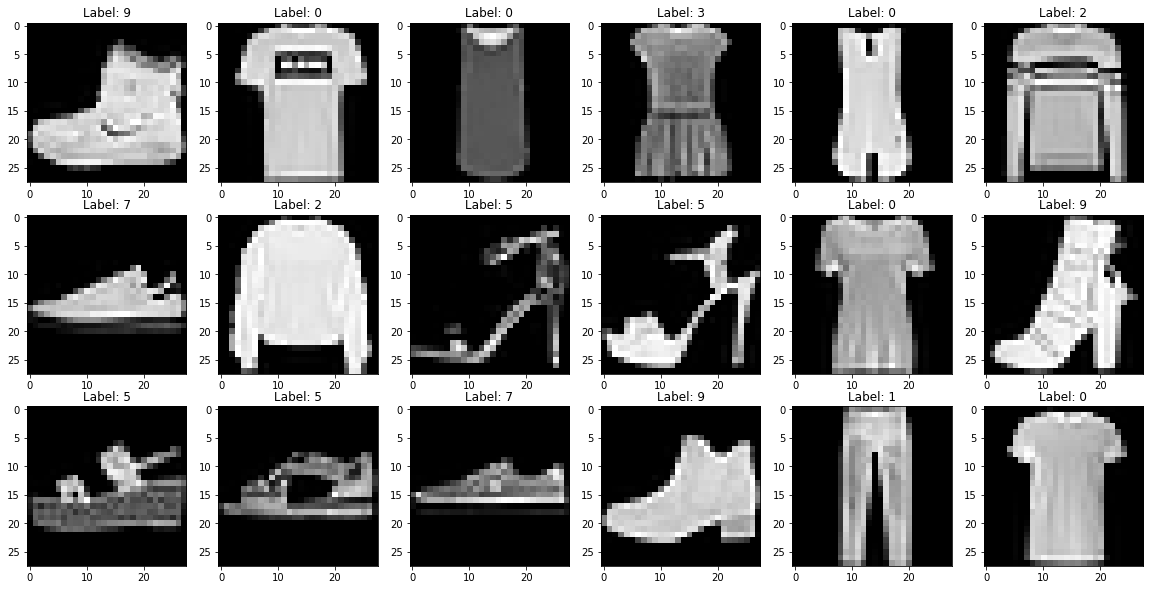

In [10]:
plot_mnist(data=fmnist_tr)

### Split train dataset into train and valid

In [11]:
class mnist_dataset(Dataset):
  def __init__(self, data, targets, transform=None, target_transform=None):
    super().__init__()

    self.data = data
    self.targets = targets
    self.transform = transform
    self.target_transform = target_transform
    pass

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    x, y = self.data[idx], self.targets[idx]

    if self.transform:
      x = self.transform(x)
    if self.target_transform:
      y = self.target_transform(y)

    return x, y

In [12]:
def split_train_valid(dataset, valid_ratio=0.1):
  # 이 부분을 채워 보겠습니다.
  # 실습 때 사용한 부분을 그대로 적용하셔도 되지만, 가능하다면 학습 데이터를 random하게 섞은 후에 split을 시도해보겠습니다.
  # 기존의 실습 코드는 데이터의 앞 부분을 train, 뒷 부분을 valid로 사용합니다.
  # 주의하세요, dataset의 data와 targets을 똑같이 shuffle 하셔야 원하는 label을 제대로 지정해 줄 수 있습니다!
  # 시도해 보시고 shuffle이 제대로 안 되는 것 같으면 5주차 실습에 있는 코드를 사용해 주세요.
    n_valid = int(len(dataset) * valid_ratio)
    train_data = dataset.data[:-n_valid].numpy()
    valid_data = dataset.data[-n_valid:].numpy()
    train_targets = dataset.targets[:-n_valid]
    valid_targets = dataset.targets[-n_valid:]
    
    train = mnist_dataset(data=train_data, targets=train_targets, transform=dataset.transform, target_transform=dataset.target_transform)
    valid = mnist_dataset(data=valid_data, targets=valid_targets, transform=dataset.transform, target_transform=dataset.target_transform)
    
    print(type(train_data))

    return train, valid

In [13]:
mnist_train, mnist_valid = split_train_valid(dataset=mnist_tr)
fmnist_train, fmnist_valid = split_train_valid(dataset=fmnist_tr)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
mnists = {}
mnists["mnist"] = {"train": mnist_train, "valid": mnist_valid, "test": mnist_test}
mnists["fmnist"] = {"train": fmnist_train, "valid": fmnist_valid, "test": fmnist_test}

for k in mnists.keys():
  print(f"Length of {k}: train - {len(mnists[k]['train'])}, valid - {len(mnists[k]['valid'])}, test - {len(mnists[k]['test'])}.")

Length of mnist: train - 54000, valid - 6000, test - 10000.
Length of fmnist: train - 54000, valid - 6000, test - 10000.


In [15]:
loaders = {}
for k in mnists.keys():
#    loaders[k] = {s: DataLoader(dataset=mnists[k][s], batch_size=64, shuffle= s == "train", drop_last=True) for s in ["train", "valid", "test"]}
    loaders[k] = torch.utils.data.DataLoader(dataset=mnists[k]['train'], batch_size=64, shuffle=True, drop_last=True, num_workers=1)

In [16]:
mnists.keys()

dict_keys(['mnist', 'fmnist'])

In [17]:
loaders

{'fmnist': <torch.utils.data.dataloader.DataLoader at 0x7f010589bd50>,
 'mnist': <torch.utils.data.dataloader.DataLoader at 0x7f01053c2ed0>}

### Check shuffling result

In [ ]:
# 위에서 출력한 결과와 label이 그대로인지 확인해 보세요!
# Shuffle에 성공하셨다면 위와는 다른 그림들이 출력됩니다.
# 각 그림에 해당하는 label은 정확히 적용이 되는지 확인해보세요!
plot_mnist(data=mnist_train)

In [ ]:
plot_mnist(data=fmnist_train)

### Get loaders

In [34]:
# 필요하다면, 후에 이 부분도 수정해 보세요!
# batch size를 바꾸시면 data loader를 다시 만들어야 합니다!
# MNIST는 거의 차이가 없을 것 같은데, FMNIST는 영향을 받을 수도 있습니다!
b_size = 256

In [35]:
mnist = [DataLoader(dataset=d, batch_size=b_size, shuffle=True, drop_last=True) for d in [mnist_train, mnist_valid, mnist_test]]
fmnist = [DataLoader(dataset=d, batch_size=b_size, shuffle=True, drop_last=True) for d in [fmnist_train, fmnist_valid, fmnist_test]]
datas = {"mnist": mnist, "fmnist": fmnist}

## 2. Model

### Base model

Model's Best Results & Combinations
- **MNIST**
    - [Setting] Optimizer: nadam, lr: 0.01, max_epochs: 30
    - [TRAIN] Epoch: 20, train loss: 0.033947, train acc: 0.990179, valid loss: 0.142258, valid acc: 0.977072
    - [TEST] **Test loss: 0.190224, Test acc: 0.976062**

- **FMNIST**
    - [Setting] Optimizer: adam, lr: 0.005, max_epochs: 30
    - [TRAIN] Epoch: 20, train loss: 0.218794, train acc: 0.917634, valid loss: 0.393296, valid acc: 0.874660
    - [TEST] **Test loss: 0.384321, Test acc: 0.881711**


In [29]:
class BaseClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.name = "base"
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 64),
        nn.ReLU(),
        nn.Linear(64, 64),
        nn.ReLU(),
        nn.Linear(64, n_class),
    )

  def forward(self, x):
    return self.model(x)

### First Customized Model - Deep model w/ different dimension

Model's Best Results & Combinations
- **MNIST**
    - [Setting] Optimizer: adadelta, lr: 1, max_epochs: 50
    - [TRAIN] Epoch: 40, train loss: 0.000008, train acc: 1.000000, valid loss: 0.111172, valid acc: 0.985394
    - [TEST] **Test loss: 0.120115, Test acc: 0.983173**

- **FMNIST**
    - [Setting] Optimizer: adam, lr: 0.001, max_epochs: 50
    - [TRAIN] Epoch: 40, train loss: 0.103485, train acc: 0.960305, valid loss: 0.434681, valid acc: 0.893342
    - [TEST] **Test loss: 0.537641, Test acc: 0.890825**

In [30]:
class DeepClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.name = "deep"
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 256),
        nn.ReLU(),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, n_class),
    )

  def forward(self, x):
    return self.model(x)

### Second Customized Model - Deep model w/ LeakyReLU

Model's Best Results & Combinations
- **MNIST**
    - [Setting] Optimizer: nadam, lr: 0.001, max_epochs: 50
    - [TRAIN] Epoch: 40, train loss: 0.006842, train acc: 0.997991, valid loss: 0.108269, valid acc: 0.981658
    - [TEST] **Test loss: 0.103231, Test acc: 0.984175**

- **FMNIST**
    - [Setting] Optimizer: nadam, lr: 0.001, max_epochs: 50
    - [TRAIN] Epoch: 40, train loss: 0.070437, train acc: 0.973270, valid loss: 0.528975, valid acc: 0.892663
    - [TEST] **Test loss: 0.585642, Test acc: 0.895433**

In [31]:
class DeepAfClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.name = "deepaf"
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 256),
        nn.LeakyReLU(),
        nn.Linear(256, 256),
        nn.LeakyReLU(),
        nn.Linear(256, 256),
        nn.LeakyReLU(),
        nn.Linear(256, 128),
        nn.LeakyReLU(),
        nn.Linear(128, 128),
        nn.LeakyReLU(),
        nn.Linear(128, n_class),
    )

  def forward(self, x):
    return self.model(x)

### Third Customized Model - Deep model w/ Batch Normalization & Dropout

Model's Best Results & Combinations
- **MNIST**
    - [Setting] Model: deepbndo, Optimizer: nadam, lr: 0.005, max_epochs: 100
    - [TRAIN] Epoch: 90, train loss: 0.022263, train acc: 0.992727, valid loss: 0.058469, valid acc: 0.986923
    - [TEST] **Test loss: 0.052858, Test acc: 0.987280**

- **FMNIST**
    - [Setting] Model: deepbndo, Optimizer: adam, lr: 0.001, max_epochs: 100
    - [TRAIN] Epoch: 90, train loss: 0.128343, train acc: 0.952734, valid loss: 0.324348, valid acc: 0.900476
    - [TEST] **Test loss: 0.327462, Test acc: 0.902444**

In [32]:
class DeepBNDOClassifier(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.name = "deepbndo"
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 256),
        nn.BatchNorm1d(256),
        nn.Dropout(0.5),
        nn.LeakyReLU(),
        nn.Linear(256, 256),
        nn.LeakyReLU(),
        nn.Linear(256, 256),
        nn.LeakyReLU(),
        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.Dropout(0.2),
        nn.LeakyReLU(),
        nn.Linear(128, 128),
        nn.LeakyReLU(),
        nn.Linear(128, n_class),
    )

  def forward(self, x):
    return self.model(x)

### Using get_model function

In [33]:
def get_model(model_name):
  if model_name.lower() == "base":
    return BaseClassifier()
  elif model_name.lower() == "deep":
    return DeepClassifier()
  elif model_name.lower() == "deepaf":
    return DeepAfClassifier()
  elif model_name.lower() == "deepbndo":
    return DeepBNDOClassifier()
  else:
    raise ValueError(f"model name {model_name} is not supported")

## 3. Trainer

### Make trainer

In [28]:
class Trainer(nn.Module):
  def __init__(self, model, opt="sgd", lr=0.001, device="cpu"):
    super().__init__()
    self.path = f"_model_{model.name}_opt_{opt}_lr_{lr}"

    self.model = model
    self.loss = nn.CrossEntropyLoss()
    self._get_optimizer(opt=opt.lower(), lr=lr)

    self.device = device
    pass

  def _get_optimizer(self, opt, lr=0.001):
    if opt == "sgd":
      self.optimizer = torch.optim.SGD(params=self.model.parameters(), lr=lr)
    elif opt == "adam":
      self.optimizer = torch.optim.Adam(params=self.model.parameters(), lr=lr)
    elif opt == "adadelta":
      self.optimizer = torch.optim.Adadelta(params=self.model.parameters(), lr=lr)
    elif opt == "adagrad":
      self.optimizer = torch.optim.Adagrad(params=self.model.parameters(), lr=lr)
    elif opt == "rms":
      self.optimizer = torch.optim.RMSprop(params=self.model.parameters(), lr=lr)
    elif opt == "nadam":
      self.optimizer = torch.optim.NAdam(params=self.model.parameters(), lr=lr)
    else:
      raise ValueError(f"optimizer {opt} is not supproted")

  def train(self, data_name, train_loader, valid_loader, max_epochs=10):
    print("===== Train Start =====")
    history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}
    for e in range(max_epochs):
      train_loss, train_acc = self._train_epoch(train_loader)
      valid_loss, valid_acc = self._valid_epoch(valid_loader)

      history["train_loss"].append(train_loss)
      history["train_acc"].append(train_acc)
      history["valid_loss"].append(valid_loss)
      history["valid_acc"].append(valid_acc)

      if e % 10 == 0:
        print(f"Epoch: {e}, train loss: {train_loss:>6f}, train acc: {train_acc:>3f}, valid loss: {valid_loss:>6f}, valid acc: {valid_acc:>3f}")

    self.plot_history(history, data_name, max_epochs)

  def _train_epoch(self, train_loader):
    epoch_loss, epoch_acc = 0, 0
    self.model.train()
    for (x, y) in train_loader:
      x = x.to(self.device)
      y = y.to(self.device)

      y_hat = self.model(x)
      loss = self.loss(y_hat, y)

      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()

      epoch_loss += loss.to("cpu").item()
      epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

    return epoch_loss / len(train_loader), epoch_acc / len(train_loader)
  
  def _valid_epoch(self, valid_loader):
    epoch_loss, epoch_acc = 0, 0
    self.model.eval()
    with torch.no_grad():
      for (x, y) in valid_loader:
        x = x.to(self.device)
        y = y.to(self.device)

        y_hat = self.model(x)
        loss = self.loss(y_hat, y)

        epoch_loss += loss.to("cpu").item()
        epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

    return epoch_loss / len(valid_loader), epoch_acc / len(valid_loader)

  def plot_history(self, history, data_name, max_epochs):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history["train_loss"], color="red", label="train loss")
    ax.plot(history["valid_loss"], color="blue", label="valid loss")
    ax.set_title("Loss")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history["train_acc"], color="red", label="train acc")
    ax.plot(history["valid_acc"], color="blue", label="valid acc")
    ax.set_title("Acc")
    ax.legend()

    path = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "plots", f"data_{data_name}" + self.path + f"_max_epochs_{max_epochs}.png")
    plt.savefig(path, bbox_inches="tight")
    pass

  def test(self, test_loader):
    epoch_loss, epoch_acc = 0, 0
    self.model.eval()
    with torch.no_grad():
      for (x, y) in test_loader:
        x = x.to(self.device)
        y = y.to(self.device)

        y_hat = self.model(x)
        loss = self.loss(y_hat, y)

        epoch_loss += loss.to("cpu").item()
        epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

    epoch_loss /= len(test_loader)
    epoch_acc /= len(test_loader)

    print(f"Test Result ===== Test loss: {epoch_loss:>6f}, Test acc: {epoch_acc:>3f}")

### Train and test

In [25]:
p = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "plots")
if not os.path.isdir(p):
  os.mkdir(p)

In [37]:
ds = ["mnist", "fmnist"]
models = ["deepbndo"]
opts = ["sgd", "adam", "adadelta", "rms", "nadam"]
lrs = [0.001,0.005, 0.01, 0.1, 1]
max_epochs = 100

In [ ]:
 for d in ds:
  for m in models:
    for opt in opts:
      for lr in lrs:
        model = get_model(model_name = m)
        trainer = Trainer(model=model, opt=opt, lr=lr)
        print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
        trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
        trainer.test(test_loader=datas[d][2])

#Final Results

===== Data: mnist, Model: deepbndo, Optimizer: nadam, lr: 0.005, max_epochs: 100 =====
===== Train Start =====
Epoch: 0, train loss: 0.358048, train acc: 0.892318, valid loss: 0.119475, valid acc: 0.963655
Epoch: 10, train loss: 0.082130, train acc: 0.973828, valid loss: 0.058035, valid acc: 0.984885
Epoch: 20, train loss: 0.056178, train acc: 0.982571, valid loss: 0.056031, valid acc: 0.985224
Epoch: 30, train loss: 0.046819, train acc: 0.985714, valid loss: 0.051421, valid acc: 0.986413
Epoch: 40, train loss: 0.034898, train acc: 0.988449, valid loss: 0.058193, valid acc: 0.984715
Epoch: 50, train loss: 0.033618, train acc: 0.989193, valid loss: 0.058079, valid acc: 0.986073
Epoch: 60, train loss: 0.028780, train acc: 0.990978, valid loss: 0.058594, valid acc: 0.986583
Epoch: 70, train loss: 0.027636, train acc: 0.991239, valid loss: 0.053207, valid acc: 0.986243
Epoch: 80, train loss: 0.023210, train acc: 0.992485, valid loss: 0.057487, valid acc: 0.986923
Epoch: 90, train loss: 0.0

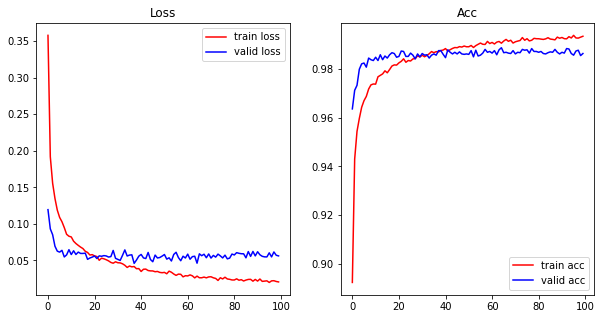

In [42]:
# MNIST dataset에 대해 여러분이 찾은 최적의 조건으로 학습을 한 번 더 진행해 주세요.
d = "mnist"
m = "deepbndo"
opt = "nadam"
lr = 0.005
max_epochs = 100

model = get_model(model_name = m)
trainer = Trainer(model=model, opt=opt, lr=lr)
print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
trainer.test(test_loader=datas[d][2])


**Test Result ===== Test loss: 0.064872, Test acc: 0.985577**

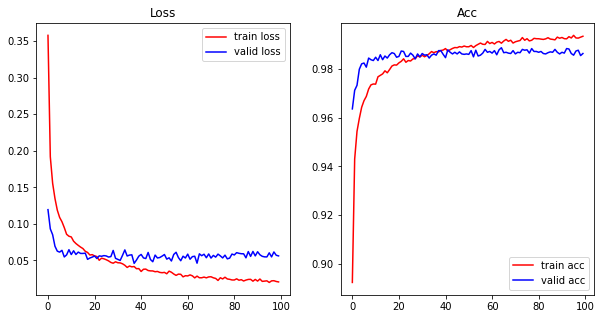

===== Data: fmnist, Model: deepbndo, Optimizer: adam, lr: 0.001, max_epochs: 100 =====
===== Train Start =====
Epoch: 0, train loss: 0.632049, train acc: 0.786663, valid loss: 0.429957, valid acc: 0.832201
Epoch: 10, train loss: 0.295921, train acc: 0.891332, valid loss: 0.308624, valid acc: 0.887568
Epoch: 20, train loss: 0.247449, train acc: 0.907664, valid loss: 0.294144, valid acc: 0.893682
Epoch: 30, train loss: 0.214888, train acc: 0.919215, valid loss: 0.287620, valid acc: 0.897079
Epoch: 40, train loss: 0.191029, train acc: 0.928441, valid loss: 0.303753, valid acc: 0.896399
Epoch: 50, train loss: 0.172099, train acc: 0.934524, valid loss: 0.298606, valid acc: 0.901325
Epoch: 60, train loss: 0.157454, train acc: 0.941332, valid loss: 0.315592, valid acc: 0.896060
Epoch: 70, train loss: 0.146712, train acc: 0.945331, valid loss: 0.295026, valid acc: 0.900985
Epoch: 80, train loss: 0.134462, train acc: 0.950186, valid loss: 0.317782, valid acc: 0.901155
Epoch: 90, train loss: 0.1

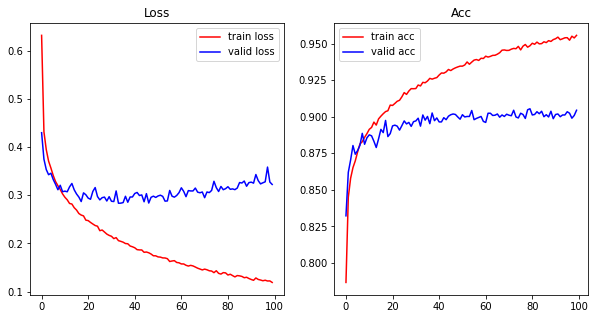

In [41]:
# FashionMNIST dataset에 대해 여러분이 찾은 최적의 조건으로 학습을 한 번 더 진행해 주세요.
d = "fmnist"
m = "deepbndo"
opt = "adam"
lr = 0.001
max_epochs = 100

model = get_model(model_name = m)
trainer = Trainer(model=model, opt=opt, lr=lr)
print(f"===== Data: {d}, Model: {m}, Optimizer: {opt}, lr: {lr}, max_epochs: {max_epochs} =====")
trainer.train(data_name=d, train_loader=datas[d][0], valid_loader=datas[d][1], max_epochs=max_epochs)
trainer.test(test_loader=datas[d][2])

**Test Result ===== Test loss: 0.339908, Test acc: 0.901042**
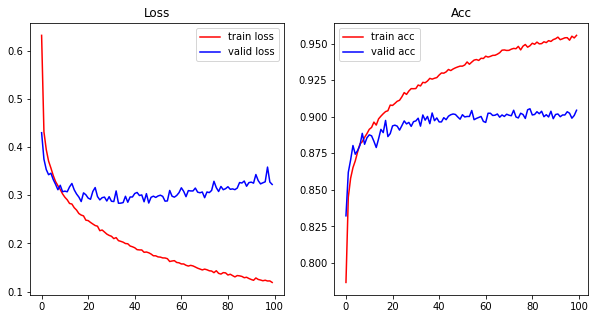